In [1]:
import cv2  
import numpy as np 

#оператор Собеля 

img = cv2.imread("Image.jpg", 0)  
 
#края по оси x и y и складывает 
x = cv2.Sobel(img,cv2.CV_16S,1,0)  # Прототип Собеля 
y = cv2.Sobel(img,cv2.CV_16S,0,1)  
  
absX = cv2.convertScaleAbs(x)   # Перенести обратно на uint8  
absY = cv2.convertScaleAbs(y)  
  
dst = cv2.addWeighted(absX,0.5,absY,0.5,0)  
  
cv2.imshow("absX", absX)  
cv2.imshow("absY", absY)  
  
cv2.imshow("Result", dst)  
  
cv2.waitKey(0)  
cv2.destroyAllWindows()   

In [2]:
img = cv2.blur(img, (5, 5))

In [5]:
#оператор Лапласа 
ddepth = cv2.CV_16S
    
src = cv2.imread("Image.jpg", 1) 
src_gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
src = cv2.GaussianBlur(src, (3, 3), 0)

dst = cv2.Laplacian(src_gray, ddepth, ksize=3)
abs_dst = cv2.convertScaleAbs(dst)
  
cv2.imshow('Result',abs_dst)
cv2.waitKey(0)


-1

In [8]:
#детектор границ Кэнни
src = cv2.imread("Image.jpg", 1) 
src_gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

dst = cv2.Canny(src_gray,100,25,L2gradient=False)
abs_dst = cv2.convertScaleAbs(dst)
  
cv2.imshow('Result',abs_dst)
cv2.waitKey(0)

-1

In [10]:
image1 = cv2.imread('Image3.jpg',1)
img_gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
 
ret, thresh1 = cv2.threshold(img_gray1, 150, 255, cv2.THRESH_BINARY)
contours2, hierarchy2 = cv2.findContours(thresh1, cv2.RETR_EXTERNAL,
                                               cv2.CHAIN_APPROX_SIMPLE)
image_copy2 = image1.copy()
cv2.drawContours(image_copy2, contours2, -1, (0, 255, 0), 2, cv2.LINE_AA)
cv2.imshow('SIMPLE Approximation contours', image_copy2)
cv2.waitKey(0)

-1

In [14]:
image1 = cv2.imread('Image3.jpg',1)
image1 = cv2.blur(image1, (5, 5))
img_gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
 
ret, thresh1 = cv2.threshold(img_gray1, 150, 255, cv2.THRESH_BINARY)
contours2, hierarchy2 = cv2.findContours(thresh1, cv2.RETR_TREE,
                                               cv2.CHAIN_APPROX_SIMPLE)
image_copy2 = image1.copy()
cv2.drawContours(image_copy2, contours2, -1, (0, 255, 0), 2, cv2.LINE_AA)
cv2.imshow('SIMPLE Approximation contours', image_copy2)
cv2.waitKey(0)


-1

In [15]:
print(len(contours2))

198


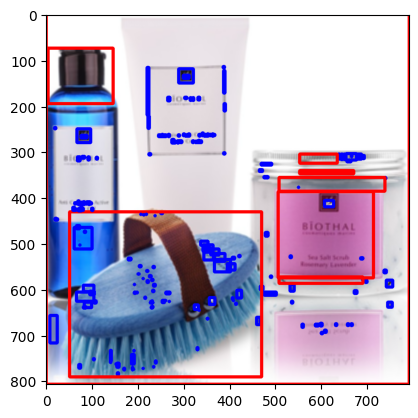

In [20]:
import matplotlib.pyplot as plt
for c in contours2:
    x, y, w, h = cv2.boundingRect(c)
    if w > 40:
        cv2.rectangle(image1, (x, y), (x + w, y + h), (255, 0, 0), 5)
    else:
        cv2.rectangle(image1, (x, y), (x + w, y + h), (0, 0, 255), 5)

plt.imshow(image1)
plt.show()

In [22]:
import cv2
import numpy as np
import math

image1 = cv2.imread('lines.jpg')
gray=cv2.cvtColor(image1,cv2.COLOR_BGR2GRAY)
dst = cv2.Canny(gray, 50, 200)

lines= cv2.HoughLines(dst, 1, math.pi/180.0, 100, np.array([]), 0, 0)

a,b,c = lines.shape
for i in range(a):
    rho = lines[i][0][0]
    theta = lines[i][0][1]
    a = math.cos(theta)
    b = math.sin(theta)
    x0, y0 = a*rho, b*rho
    pt1 = ( int(x0+1000*(-b)), int(y0+1000*(a)) )
    pt2 = ( int(x0-1000*(-b)), int(y0-1000*(a)) )
    cv2.line(image1, pt1, pt2, (0, 0, 255), 2, cv2.LINE_AA)


cv2.imshow('image1',image1)
cv2.waitKey(0)

-1

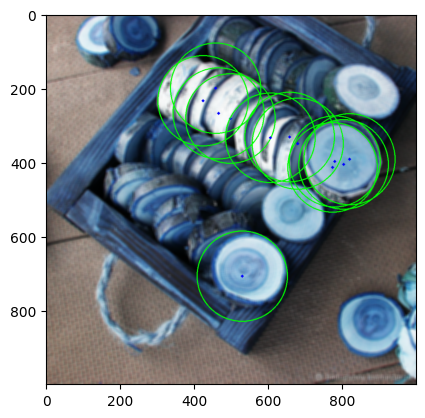

In [24]:
from matplotlib import pyplot as plt
img = cv2.imread('Image16.jpg', cv2.IMREAD_COLOR)
img = cv2.blur(img, (9, 9))

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_blur = cv2.medianBlur(gray, 5)
circles = cv2.HoughCircles(img_blur, cv2.HOUGH_GRADIENT, 1, img.shape[0] / 64, param1=200, param2=10, minRadius=120,
                           maxRadius=125)

if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        # Draw outer circle
        cv2.circle(img, (i[0], i[1]), i[2], (0, 255, 0), 2)
        # Draw inner circle
        cv2.circle(img, (i[0], i[1]), 2, (0, 0, 255), 3)
plt.imshow(img)
plt.show()

In [25]:
circles[0, :].shape[0]

12